/Users/chenxiaoyu/opt/anaconda3/envs/wth/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:89: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/chenxiaoyu/opt/anaconda3/envs/wth/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:106: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/chenxiaoyu/opt/anaconda3/envs/wth/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:123: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/chenxiaoyu/opt/anaconda3/envs/wth/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:129: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

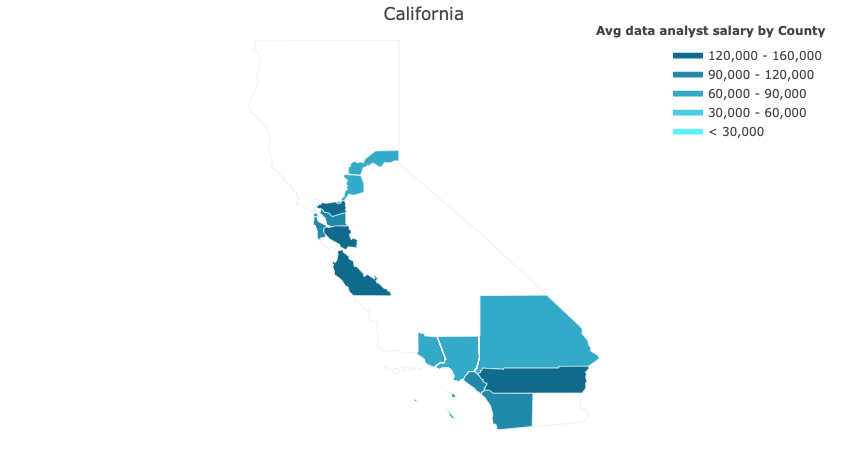

In [92]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample_r = pd.read_csv('https://raw.githubusercontent.com/jahkaj/Sta160/main/groupdf(4).csv')

values = df_sample_r['Salary'].tolist()
fips = df_sample_r['county_fips'].tolist()

colorscale = ['#62efff','#49cce4','#33aac8','#2189aa','#106a8c','#004c6d'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[30000, 60000, 90000, 120000, 160000], colorscale=colorscale,
    county_outline={'color': '#FFFFFF', 'width': 0.5}, round_legend_values=True,
    legend_title='Avg data analyst salary by County', title='California'
)
fig.layout.template = None
fig.show()

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/jahkaj/Sta160/main/groupdf(4).csv')
df.head()

,Unnamed: 0,Location,Salary,Rating,count,county_fips,population
0,0,Alameda,38905.000000,3.45,2,6001,79827
1,1,Buena Park,59005.000000,3.10,1,6059,82228
2,2,Burbank,44372.666667,3.90,3,6037,103411
3,3,Calabasas,67402.000000,3.70,2,6037,23842
4,4,Carson,58338.000000,4.30,2,6037,91354


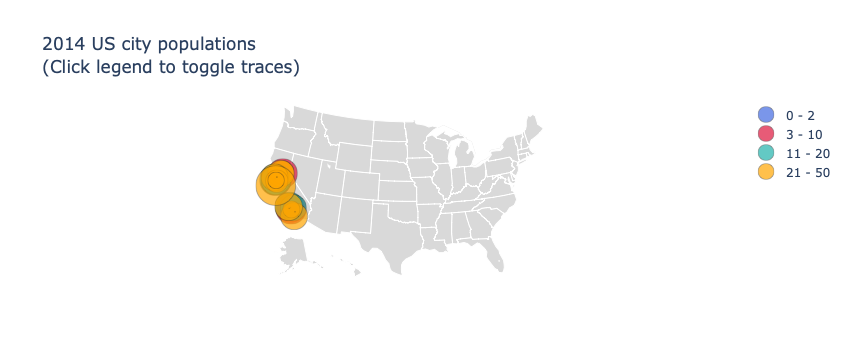

In [42]:
import plotly.graph_objects as go

df['text'] = df['Location']  + str(df['count'])+ '<br> job(s) offering' + str(df['Rating'])+'<br> rating'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub["Salary"]/200,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))
    
fig.update_layout(
        title_text = 'California data analyst Avg Sakary)',
        showlegend = True,
    width=800, height=400,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )


fig.show()


In [70]:
# Load data, define hover text and bubble size
jobs = pd.read_csv('https://raw.githubusercontent.com/jahkaj/141b/main/jobs(1).csv')

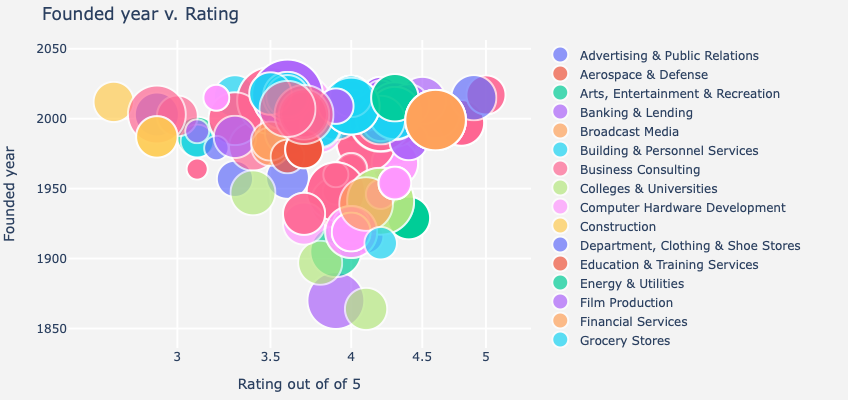

In [86]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math




hover_text = []
bubble_size = []

for index, row in jobs.iterrows():
    hover_text.append(('Company: {company}<br>'+
                      'Salary: {salary}<br>'+
                      'Rating: {rating}<br>'+
                      'Location: {location}<br>'+
                      'Fund year: {fund}<br>'+
                      'Industry: {industry}').format(company=row['Company'],
                                            salary=row['Salary'],
                                            rating=row['Rating'],
                                            location=row['Location'],
                                            fund=row['Founded'],
                                            industry=row['Industry']))
    bubble_size.append(math.sqrt(row['Salary']))

jobs['text'] = hover_text
jobs['size'] = jobs['Salary']-min(jobs['Salary']+1)
sizeref = 2.*max(jobs['size'])/(5000)

# Dictionary with dataframes for each continent
industry_names = jobs.groupby('Industry').count().reset_index()['Industry'].tolist()
industry_data = {Industry:jobs.query("Industry == '%s'" %Industry)
                              for Industry in industry_names}

# Create figure
fig = go.Figure()

for industry_name, Industry in industry_data.items():
    fig.add_trace(go.Scatter(
        x=Industry['Rating'], y=Industry['Founded'],
        name=industry_name, text=Industry['text'],
        marker_size=Industry['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    margin=dict(l=40, r=20, t=40, b=40),
    title='Founded year v. Rating',
    xaxis=dict(
        title='Rating out of of 5',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Founded year',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    width=800, height=400,
)
fig.show()
fig.write_html("file.html")

In [52]:
industry_names = jobs.groupby('Industry').count().reset_index()['Industry'].tolist()
continent_data = {Industry:jobs.query("Industry == '%s'" %Industry)
                              for Industry in industry_names}


In [78]:
bubble_size-min(bubble_size)

TypeError: unsupported operand type(s) for -: 'list' and 'float'